# Machine Learning Model Implementation for VKP

# Importing Modules

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading Dataset from Excel Sheet

In [2]:
# Reading Dataset from Excel Sheet
dataset=pd.read_csv('main_data.csv')
print (dataset)

         Vata  Pitta  Kapha  Age Gender  V  K  P
0       364.0  336.0  322.0   30      M  0  1  0
1       330.0  335.0  338.0   30      M  1  1  1
2       399.0  401.0  407.0   30      M  1  0  1
3       466.0  468.0  469.0   30      M  0  1  0
4       504.0  503.0  507.0   30      M  0  0  0
...       ...    ...    ...  ...    ... .. .. ..
103031  447.0  490.0  407.0   23      M  1  1  1
103032  404.0  447.0  375.0   23      M  1  1  1
103033  374.0  422.0  332.0   23      M  1  1  1
103034  363.0  425.0  310.0   23      M  0  0  1
103035  359.0  440.0  291.0   23      M  0  1  1

[103036 rows x 8 columns]


# Identifying Independent and Dependent Variables

In [3]:
# Identifying Independent Variables and Dependent Variables
X=dataset.iloc[:,:-3].values
y_v=dataset.iloc[:,-3].values
print (X)
print (y_v)

[[364.0 336.0 322.0 30 'M']
 [330.0 335.0 338.0 30 'M']
 [399.0 401.0 407.0 30 'M']
 ...
 [374.0 422.0 332.0 23 'M']
 [363.0 425.0 310.0 23 'M']
 [359.0 440.0 291.0 23 'M']]
[0 1 1 ... 1 0 0]


In [4]:
y_k=dataset.iloc[:,-2].values
print (y_k)

[1 1 0 ... 1 0 1]


In [5]:
y_p=dataset.iloc[:,-1].values
print (y_p)

[0 1 1 ... 1 1 1]


In [6]:
dataset.describe()

,Vata,Pitta,Kapha,Age,V,K,P
count,103024.000000,103024.000000,103024.000000,103036.000000,103036.000000,103036.000000,103036.000000
mean,519.278751,516.089824,520.338009,26.501106,0.475397,0.475843,0.474232
std,167.909479,188.598363,166.507807,4.174877,0.499397,0.499419,0.499338
min,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,422.000000,417.000000,432.000000,22.000000,0.000000,0.000000,0.000000
50%,496.000000,496.000000,493.000000,26.000000,0.000000,0.000000,0.000000
75%,549.000000,537.000000,539.000000,30.000000,1.000000,1.000000,1.000000
max,980.000000,980.000000,981.000000,36.000000,1.000000,1.000000,1.000000


In [7]:
dataset.columns

Index(['Vata', 'Pitta', 'Kapha', 'Age', 'Gender', 'V', 'K', 'P'], dtype='object')

In [8]:
dataset.Vata.unique()

array([364., 330., 399., 466., 504., 518., 535., 522., 519., 514., 515.,
       513., 508., 512., 509., 510., 507., 503., 506., 511., 517., 520.,
       505., 502., 516., 524., 521., 497., 523., 527., 525., 501., 498.,
       492., 496., 526., 493., 500., 531., 542., 495., 499., 528., 296.,
       308., 340., 369., 394., 401., 404., 407., 453., 628., 814., 882.,
       790., 629., 488., 426., 417., 437., 438., 423., 396., 380., 383.,
       415., 412., 429., 576., 796., 895., 821., 666., 410., 433., 431.,
       414., 397., 392., 402., 416., 483., 707., 883., 886., 753., 587.,
       439., 393., 430., 398., 384., 389., 539., 772., 907., 857., 682.,
       395., 409., 420., 406., 385., 375., 390., 413., 571., 773., 862.,
       614., 457., 391., 387., 400., 725., 870., 818., 657., 418., 455.,
       675., 848., 868., 743., 584., 388., 434., 427., 405., 386., 468.,
       699., 887., 747., 581., 382., 421., 408., 436., 646., 844., 890.,
       774., 611., 458., 447., 440., 419., 403., 77

In [9]:
dataset.isnull().count()

Vata      103036
Pitta     103036
Kapha     103036
Age       103036
Gender    103036
V         103036
K         103036
P         103036
dtype: int64

# Data Pre-Processing - Missing Values

In [10]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :4])
X[:, :4] = imputer.transform(X[:, :4])
print(X)

[[364.0 336.0 322.0 30.0 'M']
 [330.0 335.0 338.0 30.0 'M']
 [399.0 401.0 407.0 30.0 'M']
 ...
 [374.0 422.0 332.0 23.0 'M']
 [363.0 425.0 310.0 23.0 'M']
 [359.0 440.0 291.0 23.0 'M']]


#Data Pre-Processing - Categorical Data

In [11]:
# Non-Numeric Data has to be encoded
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 1.0 364.0 336.0 322.0 30.0]
 [0.0 1.0 330.0 335.0 338.0 30.0]
 [0.0 1.0 399.0 401.0 407.0 30.0]
 ...
 [0.0 1.0 374.0 422.0 332.0 23.0]
 [0.0 1.0 363.0 425.0 310.0 23.0]
 [0.0 1.0 359.0 440.0 291.0 23.0]]


# Data Pre-Processing - Training and Testing Data Split

In [12]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [4])])

In [13]:
dataset.columns

Index(['Vata', 'Pitta', 'Kapha', 'Age', 'Gender', 'V', 'K', 'P'], dtype='object')

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X, y_v, test_size = 0.3, random_state = 1)
Xk_train, Xk_test, yk_train, yk_test = train_test_split(X, y_k, test_size = 0.3, random_state = 1)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X, y_p, test_size = 0.3, random_state = 1)
print(Xv_train)
print(Xv_test)
print(yv_train)
print(yv_test)


[[0.0 1.0 733.0 478.0 424.0 28.0]
 [0.0 1.0 977.0 978.0 682.0 34.0]
 [0.0 1.0 506.0 505.0 489.0 24.0]
 ...
 [0.0 1.0 868.0 836.0 676.0 32.0]
 [0.0 1.0 438.0 435.0 426.0 30.0]
 [0.0 1.0 789.0 623.0 773.0 22.0]]
[[1.0 0.0 417.0 458.0 476.0 28.0]
 [1.0 0.0 473.0 489.0 477.0 26.0]
 [0.0 1.0 503.0 515.0 515.0 24.0]
 ...
 [0.0 1.0 497.0 420.0 503.0 22.0]
 [0.0 1.0 584.0 806.0 793.0 30.0]
 [1.0 0.0 559.0 533.0 486.0 28.0]]
[0 1 1 ... 1 0 0]
[0 0 1 ... 1 0 0]


In [15]:
Xv_test.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Building Logistic Regression Model

In [16]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_v = LogisticRegression(random_state = 0)
classifier_v.fit(Xv_train, yv_train)
classifier_k = LogisticRegression(random_state = 0)
classifier_k.fit(Xk_train, yk_train)
classifier_p = LogisticRegression(random_state = 0)
classifier_p.fit(Xp_train, yp_train)

LogisticRegression(random_state=0)

# Prediction of Model

In [17]:
yv_pred = classifier_v.predict(Xv_test)
print (yv_pred)
yk_pred = classifier_k.predict(Xk_test)
print (yk_pred)
yp_pred = classifier_p.predict(Xp_test)
print (yp_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Performance Statstics

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

vcm = confusion_matrix(yv_test, yv_pred)
print(vcm)
accuracy_score(yv_test, yv_pred)

kcm = confusion_matrix(yk_test, yk_pred)
print(kcm)
accuracy_score(yk_test, yk_pred)

pcm = confusion_matrix(yp_test, yp_pred)
print(pcm)
accuracy_score(yp_test, yp_pred)

[[16049    59]
 [14713    90]]
[[15276   913]
 [13814   908]]
[[16164    93]
 [14524   130]]


0.527126265730646

# Vata - Performance 

Text(0.5, 257.44, 'Predicted label')

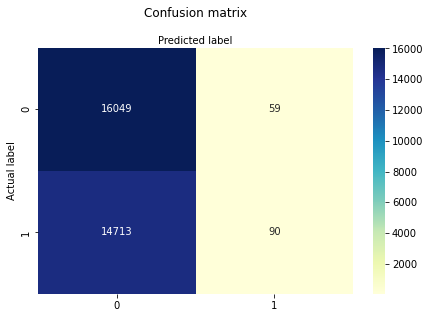

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # 0 - Vatha is in Control, 1 - Vatha is higher
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(vcm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(yv_test, yv_pred))
print("Precision:",metrics.precision_score(yv_test, yv_pred))
print("Recall:",metrics.recall_score(yv_test, yv_pred))

Accuracy: 0.5221118695609978
Precision: 0.6040268456375839
Recall: 0.006079848679321759


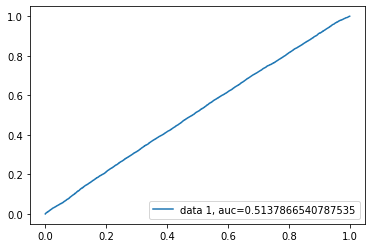

In [21]:
yv_pred_proba = classifier_v.predict_proba(Xv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yv_test,  yv_pred_proba)
auc = metrics.roc_auc_score(yv_test, yv_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Kapha - Performance


Text(0.5, 257.44, 'Predicted label')

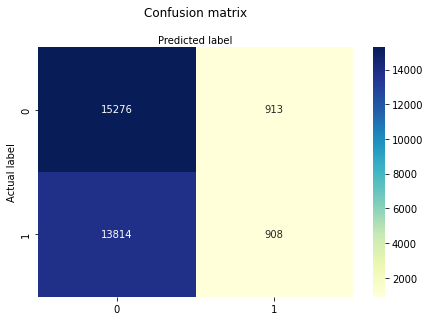

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # 0 - Kapha is in Control, 1 - Kapha is higher
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(kcm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(yk_test, yk_pred))
print("Precision:",metrics.precision_score(yk_test, yk_pred))
print("Recall:",metrics.recall_score(yk_test, yk_pred))

Accuracy: 0.5235676619973473
Precision: 0.4986271279516749
Recall: 0.0616764026626817


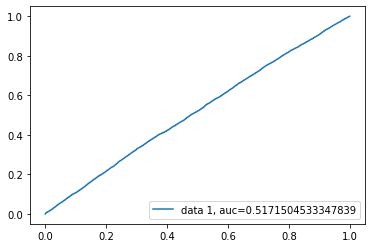

In [24]:
yk_pred_proba = classifier_k.predict_proba(Xk_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yk_test,  yk_pred_proba)
auc = metrics.roc_auc_score(yk_test, yk_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Pitta - Performance

Text(0.5, 257.44, 'Predicted label')

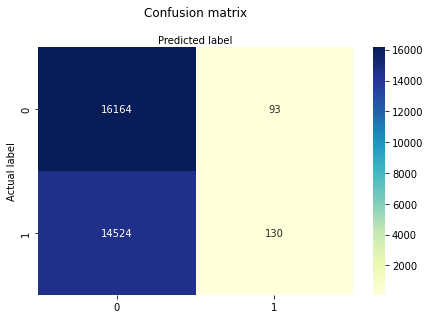

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # 0 - Pitta is in Control, 1 - Pitta is higher
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(pcm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(yp_test, yp_pred))
print("Precision:",metrics.precision_score(yp_test, yp_pred))
print("Recall:",metrics.recall_score(yp_test, yp_pred))

Accuracy: 0.527126265730646
Precision: 0.5829596412556054
Recall: 0.008871297939129249


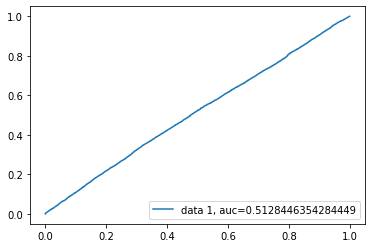

In [27]:
yp_pred_proba = classifier_p.predict_proba(Xp_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yp_test,  yp_pred_proba)
auc = metrics.roc_auc_score(yp_test, yp_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
import pickle
file =open('Bvrit_health_model.pkl','wb')
pickle.dump(classifier_v,file)